# Code

## Import libraries

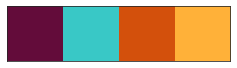

In [1]:
# Import Libraries

import pandas as pd
import seaborn as sns
import numpy as np

from scipy.stats import skew
from scipy.stats import kurtosis
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import matplotlib
import plotly
import plotly.express as px

plt.rcParams["figure.figsize"] = (14,5)
#set font size of labels on matplotlib plots
plt.rc('font', size=16)

#set style of plots
sns.set_style('white')

#define a custom palette
customPalette = ['#630C3A', '#39C8C6', '#D3500C', '#FFB139'];
sns.set_palette(customPalette)
sns.palplot(customPalette)

In [ ]:
import chart_studio
import chart_studio.plotly as py

chart_studio.tools.set_credentials_file(username='YOUR USERNAME', api_key='YOUR API KEY')

## Further preprocessing

After loading the `.csv` file which was created in the *feature_generation.ipynb* we need to pre-process the data further if we want to train machine learning models or plot the data.

One thing that immediately stands out when looking at the values is the big difference between the single values. 
To counteract this, all values were normalized column by column.

After that we need to encode the `target` column into numbers. Right now the genre is stores as a `string`. As all the machine learning models can not handle strings, numbers from 0-3 need to be encoded. Each number for one genre.


### Features and Target Split

In [2]:
df = pd.read_csv('./data/features.csv', index_col=0)
df.head()

,rmseP_a,rmseP_std,rmseH_a,rmseH_std,centroid_a,centroid_std,bw_a,bw_std,contrast_a,contrast_std,...,onset_a,onset_std,bpm,rmseP_skew,rmseP_kurtosis,rmseH_skew,rmseH_kurtosis,beats_a,beats_std,genre
29_classic,0.006021,0.005213,0.045360,0.038077,1480.631559,604.570838,1648.891528,628.269487,22.719970,10.039088,...,1.462376,0.857322,143.554688,2.129859,9.805472,2.080719,6.450456,85.680955,48.476949,classic
14_house,0.052066,0.041719,0.136698,0.078196,3762.516717,1724.160617,3900.754612,937.246472,20.778571,11.116219,...,1.899566,2.228688,123.046875,1.268941,1.505232,0.322896,-1.047561,85.267226,49.317956,house
40_punk,0.052578,0.032996,0.121333,0.038467,2937.890298,864.133447,3398.252119,675.767856,19.628705,11.304322,...,1.407821,0.948249,129.199219,1.286223,2.483256,-0.643268,0.558780,132.912830,76.325375,punk
41_punk,0.017693,0.013190,0.040457,0.018028,3827.205913,1286.111262,3988.918730,929.184487,19.657976,11.121688,...,1.350137,1.181547,156.605114,1.608109,4.135312,-0.172977,0.592332,134.249704,73.779271,punk
31_hardstyle,0.059424,0.046383,0.112370,0.083949,3778.999363,1696.153528,4050.342060,1315.930708,17.779714,10.877478,...,1.624327,1.669202,151.999081,1.902047,5.834550,1.332144,1.484488,93.872447,54.303089,hardstyle


In [3]:
X = df.drop('genre', axis=1)
y = df['genre']

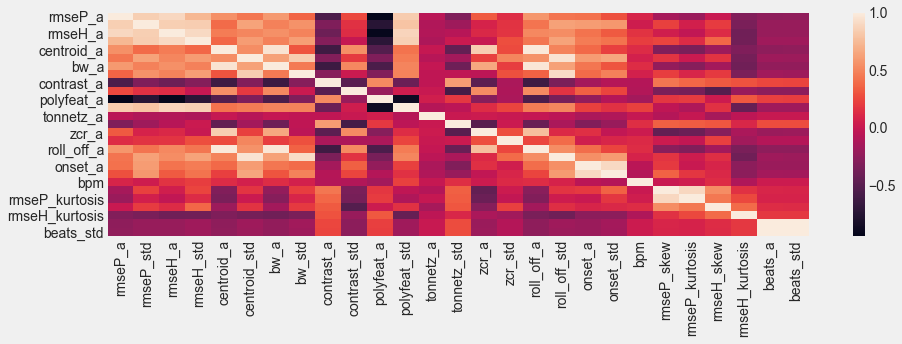

In [4]:
plt.style.use('fivethirtyeight')
sns.heatmap(df.corr())
plt.tight_layout()
plt.savefig('./plots/correlation.png')
plt.show()

In [28]:
fig = px.imshow(df.corr())
fig.write_html("./plots/heatmap.html")
py.plot(fig, filename = 'Correlations', auto_open=False)

'https://plotly.com/~maximuskarlson/14/'

In [5]:
df.describe()

,rmseP_a,rmseP_std,rmseH_a,rmseH_std,centroid_a,centroid_std,bw_a,bw_std,contrast_a,contrast_std,...,roll_off_std,onset_a,onset_std,bpm,rmseP_skew,rmseP_kurtosis,rmseH_skew,rmseH_kurtosis,beats_a,beats_std
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,...,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,0.036073,0.027623,0.088001,0.049130,2994.436980,1204.038587,3307.579895,891.028917,19.488218,11.017483,...,2585.435374,1.570533,1.582375,127.307479,1.501311,3.802657,0.402967,0.720729,111.031613,63.420063
std,0.020039,0.016042,0.049171,0.032548,854.451625,368.895235,829.766075,253.207279,1.039334,0.844991,...,801.053689,0.203204,0.633784,19.346216,0.670572,3.279275,0.702892,1.489989,34.516150,19.988461
min,0.001532,0.001073,0.011454,0.007592,762.671065,365.990677,978.010728,398.085603,16.902663,7.590889,...,778.785432,1.014253,0.385766,86.132812,-0.266478,-0.788375,-1.044806,-1.541021,25.938291,14.920694
25%,0.018126,0.012247,0.037826,0.017719,2603.527304,937.317390,2933.345187,684.774655,18.818385,10.758991,...,1946.570832,1.437235,1.151188,114.843750,1.073359,1.668459,-0.186052,-0.307543,88.948806,50.620645
50%,0.036676,0.028712,0.094657,0.040429,3053.639142,1246.296857,3415.204344,887.293357,19.288965,11.153189,...,2699.802563,1.540163,1.428740,123.046875,1.401433,3.119935,0.364953,0.337885,102.937826,58.589237
75%,0.050586,0.041075,0.129005,0.078262,3582.954370,1467.715085,3875.820180,1078.169974,19.946194,11.514470,...,3190.783551,1.685042,1.991092,143.554688,1.833891,4.832595,0.887399,1.446904,124.413841,70.938910
max,0.096491,0.066612,0.193992,0.126151,5391.529238,2333.913207,5369.616996,1478.463243,23.142453,13.636935,...,4612.324712,2.362729,3.965939,172.265625,3.876654,28.594644,2.746996,9.106017,294.244755,168.914579


### Scale

In [6]:
scaler = MinMaxScaler()

In [7]:
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=df.columns[:-1])
X_scaled.index = df.index

In [8]:
X_scaled

,rmseP_a,rmseP_std,rmseH_a,rmseH_std,centroid_a,centroid_std,bw_a,bw_std,contrast_a,contrast_std,...,roll_off_std,onset_a,onset_std,bpm,rmseP_skew,rmseP_kurtosis,rmseH_skew,rmseH_kurtosis,beats_a,beats_std
29_classic,0.047271,0.063170,0.185749,0.257126,0.155105,0.121235,0.152764,0.213059,0.932292,0.404926,...,0.144003,0.332318,0.131713,0.666667,0.578388,0.360543,0.824285,0.750582,0.222666,0.217906
14_house,0.532163,0.620181,0.686127,0.595519,0.648075,0.690154,0.665530,0.499049,0.621160,0.583080,...,0.627033,0.656529,0.514758,0.428571,0.370594,0.078059,0.360700,0.046347,0.221124,0.223368
40_punk,0.537563,0.487086,0.601952,0.260418,0.469926,0.253131,0.551106,0.257023,0.436880,0.614192,...,0.331169,0.291861,0.157110,0.500000,0.374765,0.111344,0.105896,0.197219,0.398703,0.398748
41_punk,0.170190,0.184881,0.158887,0.088021,0.662050,0.467559,0.685605,0.491586,0.441571,0.583985,...,0.540259,0.249084,0.222275,0.818182,0.452456,0.167569,0.229925,0.200371,0.403685,0.382214
31_hardstyle,0.609656,0.691342,0.552850,0.644046,0.651635,0.675922,0.699592,0.849560,0.140558,0.543593,...,0.731552,0.452418,0.358484,0.764706,0.523402,0.225400,0.626866,0.284164,0.253196,0.255740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29_house,0.338078,0.457805,0.803200,0.744709,0.469968,0.619300,0.576456,0.737973,0.461251,0.597577,...,0.683581,0.620056,0.580792,0.395349,0.385556,0.071665,0.380046,0.124713,0.246694,0.233013
130_punk,0.317409,0.411883,0.468003,0.328345,0.426966,0.438055,0.512908,0.448954,0.518422,0.594791,...,0.445877,0.291700,0.317799,0.764706,0.551443,0.246583,0.233481,0.108068,0.370728,0.368616
131_punk,0.785972,0.796150,0.620836,0.390605,0.549219,0.374769,0.519419,0.197020,0.245116,0.663525,...,0.347989,0.498701,0.320870,0.224490,0.387214,0.110905,0.389398,0.203995,0.307870,0.314226
32_classic,0.112335,0.119632,0.143745,0.106719,0.168539,0.244911,0.179275,0.295745,0.609393,0.470648,...,0.272034,0.262391,0.095854,0.363636,0.406743,0.130036,0.513553,0.266362,0.570139,0.568249


In [9]:
y

29_classic        classic
14_house            house
40_punk              punk
41_punk              punk
31_hardstyle    hardstyle
                  ...    
29_house            house
130_punk             punk
131_punk             punk
32_classic        classic
53_house            house
Name: genre, Length: 311, dtype: object

Need to impute numbers out of the different genres.



In [10]:
# instantiate labelencoder object
le = LabelEncoder()

In [11]:
y = le.fit_transform(y)

In [12]:
list(le.classes_)

['classic', 'hardstyle', 'house', 'punk']

In [14]:
encoded_classes = {}
for i, idx in zip(range(0, 4), list(le.classes_)):
    encoded_classes[idx] = i    

In [15]:
encoded_classes

{'classic': 0, 'hardstyle': 1, 'house': 2, 'punk': 3}

The label encoder generated the following mapping:

* **0:** classic
* **1:** hardstyle
* **2:** house
* **3:** punk


### Dimensionality Reduction

With the scaled and encoded data, we can now easily reduce the dimensionality. Dimensionality reduction has two main benefits. First we are able to visualize a multi dimensional dataset and secondly our machine learning algorithms are speed up.
The original data has 27 columns, anyways I projected the original data into 3 dimensions. I should note that after dimensionality reduction, there usually isn’t a particular meaning assigned to each principal component. The new components are just the two main dimensions of variation.
As the DataFrame only contains 311 rows the 27 features would probably have a overfitted model. Furthermore the third benefit is that each Machine Learning method only has to deal with 3 features and one target variable. This speeds up the calculation.

#### Feature Importance with PCA (Alone)

Now we will use all of the data and do a PCA directly. Before we first eliminated some features by doing a lasso regression. As more data is available now, we expect the PCA to be even more detailed. 

In the first step we will set a high number of prinicpal components to gather as much information about the variance distrubition as possible.

In [16]:
pca = PCA(n_components=8)
principalComponents = pca.fit_transform(X_scaled)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8'])

In [17]:
fig = px.bar(x=principalDf.columns, y= pca.explained_variance_ratio_)
fig.write_html("./plots/pca.html")

We can see (and calculate) that the first 6 PC's are responsible for 83% of the variance. Anyways it makes no sense to use more than 6 PC's. Even 4 would be a good choice (75% explained variance).

As we've seen aboce, the clusters might not be separated perfectly, therefore the worst thing we could do is overfit.

In [18]:
pca = PCA(n_components=6)
principalComponents = pca.fit_transform(X_scaled)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6'])

In [19]:
principalDf['target'] = df['genre'].values
principalDf.index = df.index
principalDf

,pc1,pc2,pc3,pc4,pc5,pc6,target
29_classic,1.076444,0.727529,-0.302007,0.141048,0.383818,0.052174,classic
14_house,-0.592701,0.060713,0.119026,-0.071594,0.003125,0.027293,house
40_punk,-0.087338,-0.212440,-0.546585,-0.129410,-0.052159,0.060108,punk
41_punk,0.303306,-0.385148,0.295129,0.501304,0.061803,0.123227,punk
31_hardstyle,-0.897385,0.088511,0.110524,0.255185,0.102330,0.021736,hardstyle
...,...,...,...,...,...,...,...
29_house,-0.582621,0.291426,0.195568,-0.088041,-0.197676,0.012209,house
130_punk,0.036164,0.186505,-0.159795,0.219158,-0.180166,0.242268,punk
131_punk,-0.444547,-0.294072,-0.363936,-0.445324,0.228665,-0.171309,punk
32_classic,0.914162,0.331400,-0.087852,0.168523,-0.091001,-0.334551,classic


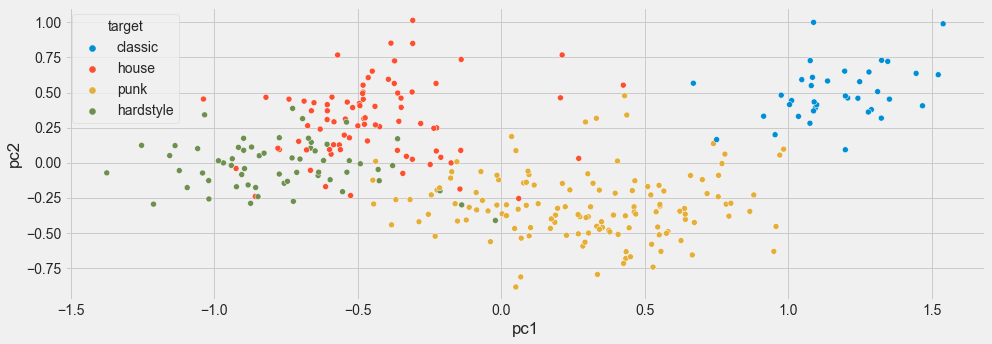

In [20]:
sns.scatterplot(data=principalDf, x='pc1', y='pc2', hue='target')
plt.tight_layout()
plt.savefig('./plots/scatter_2d.png')

In [23]:
pca = PCA(n_components=4)

principalComponents = pca.fit_transform(X_scaled)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2', 'pc3', 'pc4'])
principalDf['target'] = df['genre'].values
principalDf.index = df.index

labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}
fig = px.scatter_matrix(
    principalComponents,
    labels=labels,
    dimensions=range(4),
    color=principalDf['target']
)
fig.update_traces(diagonal_visible=False)
fig.write_html("./plots/pca_4_components.html")

In [ ]:
py.plot(fig, filename = 'PCA 4 Components', auto_open=False)

The plot above shows that even  the first to PC's give us a very good separation of the different genres. Better than before! It seems that *house*  and *hardstyle* music are very similar - this makes total sense! Both contain a dominat bass beat and are many songs are similar in general. Of course *hardsytle* contains the "harder" beats but anyways - it seems the graph does a great job! Also the fact that classic is futher apart from the other three genres is totally plausible.

**Let's check the first three PC's:**

In [22]:
fig = px.scatter_3d(principalDf, x='pc1', y='pc2', z='pc3', color='target')
fig.write_html("./plots/pca_scatter3d.html")

In a three dimensional space the separation is even better!

## Machine Learning

In [23]:
le = LabelEncoder()

In [24]:
principalDf['target_encoded'] = le.fit_transform(principalDf['target'])

In [25]:
principalDf

,pc1,pc2,pc3,pc4,pc5,pc6,target,target_encoded
29_classic,1.076444,0.727529,-0.302007,0.141048,0.383818,0.052174,classic,0
14_house,-0.592701,0.060713,0.119026,-0.071594,0.003125,0.027293,house,2
40_punk,-0.087338,-0.212440,-0.546585,-0.129410,-0.052159,0.060108,punk,3
41_punk,0.303306,-0.385148,0.295129,0.501304,0.061803,0.123227,punk,3
31_hardstyle,-0.897385,0.088511,0.110524,0.255185,0.102330,0.021736,hardstyle,1
...,...,...,...,...,...,...,...,...
29_house,-0.582621,0.291426,0.195568,-0.088041,-0.197676,0.012209,house,2
130_punk,0.036164,0.186505,-0.159795,0.219158,-0.180166,0.242268,punk,3
131_punk,-0.444547,-0.294072,-0.363936,-0.445324,0.228665,-0.171309,punk,3
32_classic,0.914162,0.331400,-0.087852,0.168523,-0.091001,-0.334551,classic,0


In [26]:
principalDf.groupby('target')['target_encoded'].value_counts()

target     target_encoded
classic    0                  37
hardstyle  1                  60
house      2                  80
punk       3                 134
Name: target_encoded, dtype: int64

Seems like everything worked fine! Each encoded number only contains the coresponding `target` value.

**Train Test Split:**

We need to make sure that the trainingsset and the testingset are balanced when it comes to the different genres. We can ensure that with the function `strtify`.

In [27]:
X = principalDf.drop(['target', 'target_encoded'], axis=1)

In [28]:
y = principalDf['target_encoded']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y ,random_state=7)

In [30]:
y_train.value_counts() / len(y_train)

3    0.432692
2    0.254808
1    0.192308
0    0.120192
Name: target_encoded, dtype: float64

In [31]:
y_test.value_counts() / len(y_test)

3    0.427184
2    0.262136
1    0.194175
0    0.116505
Name: target_encoded, dtype: float64

In [32]:
y_train.unique()

array([1, 3, 2, 0])

Perfect! Every genre has the same amount of values in the Train and Test set!

### SVM

In [33]:
clf_svm = SVC(gamma='auto')
clf_svm.fit(X_train, y_train)

SVC(gamma='auto')

In [34]:
svm_preds = clf_svm.predict(X_test, )

In [35]:
print(classification_report(le.inverse_transform(y_test), le.inverse_transform(svm_preds)))

              precision    recall  f1-score   support

     classic       1.00      0.92      0.96        12
   hardstyle       0.95      0.90      0.92        20
       house       1.00      0.93      0.96        27
        punk       0.92      1.00      0.96        44

    accuracy                           0.95       103
   macro avg       0.97      0.94      0.95       103
weighted avg       0.95      0.95      0.95       103



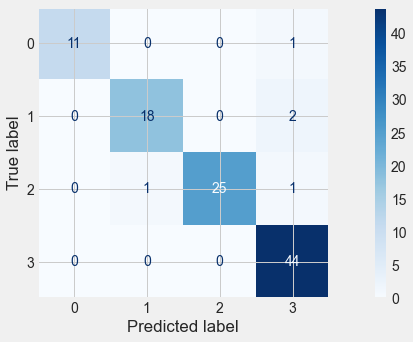

In [37]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

class_names = [0,1,2,3]

cnf_matrix = confusion_matrix(y_test, svm_preds)
disp = plot_confusion_matrix(clf_svm, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
plt.savefig('./plots/confusion_matrix.png')
plt.show()